In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loaded the cleaned transactional dataset.
df = pd.read_csv("../outputs/clean_retail_data.csv")

# Restored datetime type.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [3]:
# Reviewed dataset dimensions and time coverage.
df.shape


(805549, 9)

In [4]:
# Evaluated date range of transactions.
df["InvoiceDate"].min(), df["InvoiceDate"].max()


(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [5]:
# Assessed number of unique customers and invoices.
df["CustomerID"].nunique(), df["Invoice"].nunique()


(5878, 36969)

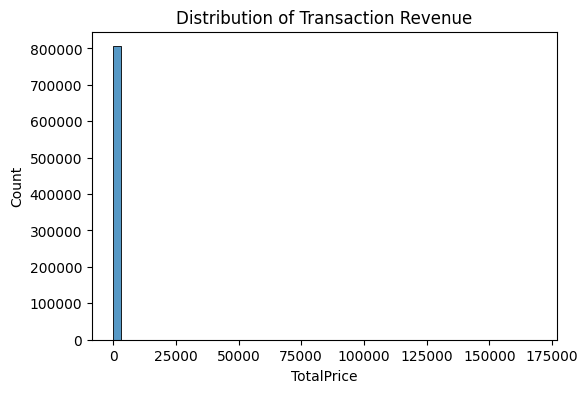

In [6]:
# Analyzed distribution of transaction-level revenue.
plt.figure(figsize=(6,4))
sns.histplot(df["TotalPrice"], bins=50)
plt.title("Distribution of Transaction Revenue")
plt.xlabel("TotalPrice")
plt.ylabel("Count")
plt.show()


In [7]:
# Checked for extreme outliers in transaction revenue.
df["TotalPrice"].describe()


count    805549.000000
mean         22.026505
std         224.041928
min           0.001000
25%           4.950000
50%          11.850000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64

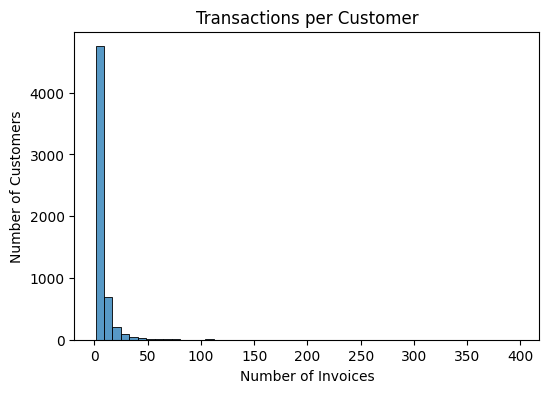

In [8]:
# Evaluated number of transactions per customer.
tx_per_customer = df.groupby("CustomerID")["Invoice"].nunique()

plt.figure(figsize=(6,4))
sns.histplot(tx_per_customer, bins=50)
plt.title("Transactions per Customer")
plt.xlabel("Number of Invoices")
plt.ylabel("Number of Customers")
plt.show()


In [9]:
# Created monthly buckets for trend analysis.
df["Month"] = df["InvoiceDate"].dt.to_period("M")


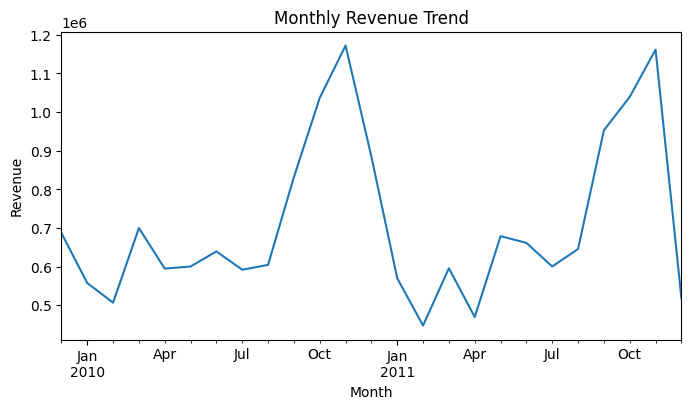

In [10]:
# Analyzed monthly revenue trend.
monthly_revenue = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(8,4))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


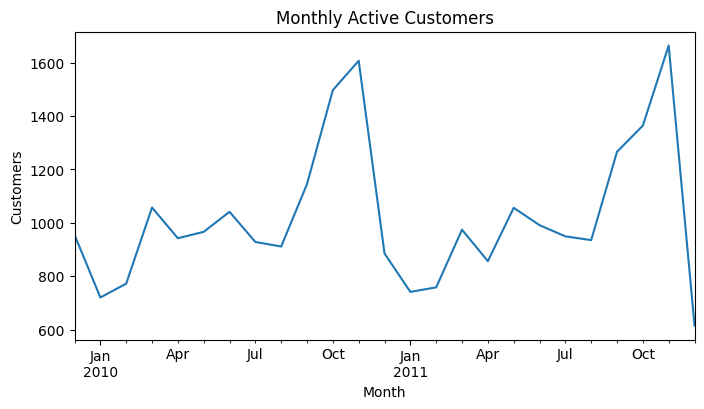

In [11]:
# Analyzed monthly active customers.
monthly_customers = df.groupby("Month")["CustomerID"].nunique()

plt.figure(figsize=(8,4))
monthly_customers.plot()
plt.title("Monthly Active Customers")
plt.xlabel("Month")
plt.ylabel("Customers")
plt.show()


In [12]:
# Identified top revenue-generating countries.
country_revenue = (
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue


Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64

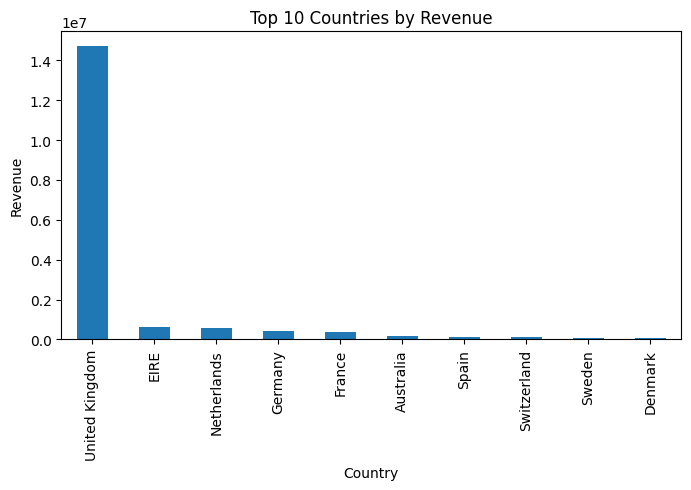

In [13]:
# Visualized revenue concentration by country.
plt.figure(figsize=(8,4))
country_revenue.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()
